# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves =  80, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 0


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/80 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 14:19:14  Samples:  14654
 /_//_/// /_\ / //_// / //_'/ //     Duration: 139.979   CPU time: 140.049
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-5f9ff51e-a16f-419e-81b6-35c7d8863f70.json

139.978 run_code  IPython/core/interactiveshell.py:3400
└─ 139.978 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 139.978 run_all_waves  simulation.py:26
      └─ 139.854 run  simulation.py:118
         ├─ 97.067 record_results  simulation.py:32
         │  ├─ 67.038 histogram  stats_cuda.py:51
         │  │  ├─ 34.171 histogram_4d  stats_cuda.py:298
         │  │  │  └─ 33.820 histogramdd  cupy/_statistics/histogram.py:285
         │  │  │     ├─ 26.889 [self]  
         │  │  │     └─ 6.595 bincount  cupy/_statistics/histogram.py:513
         │  │  │        └─ 6.582 [self]  
         │  │  ├─ 25.148 counter  stats_cuda.py:239
       

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


399999931.0
340834804.0
212468547.0


# <center> Source

photon bundle count: 400000000
photon total energy (J): 0.00550
photon total power (W): 5.50014


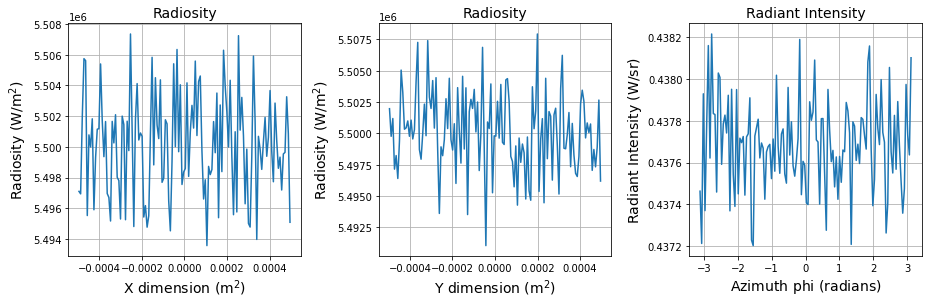

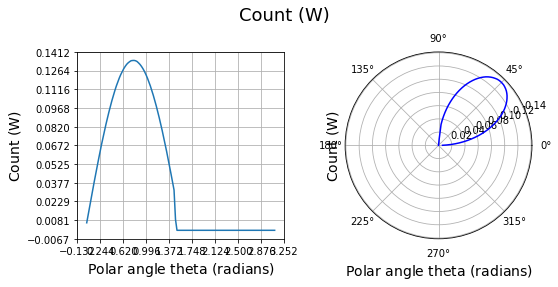

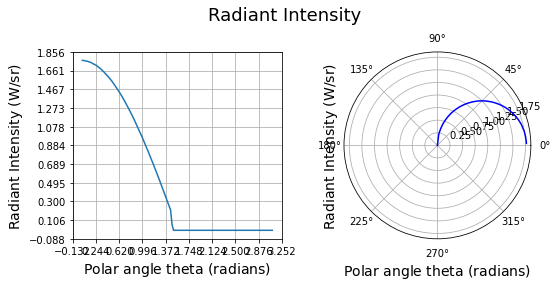

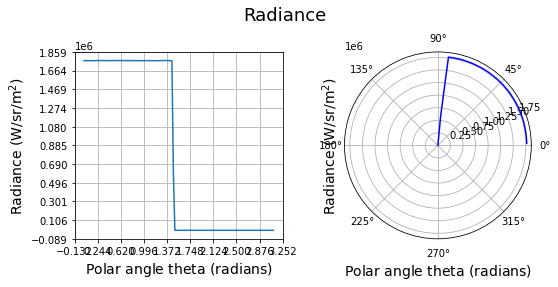

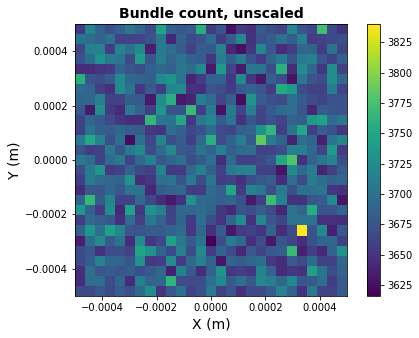

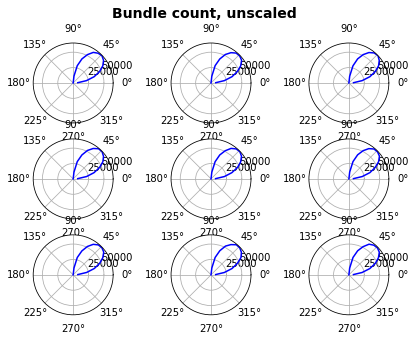

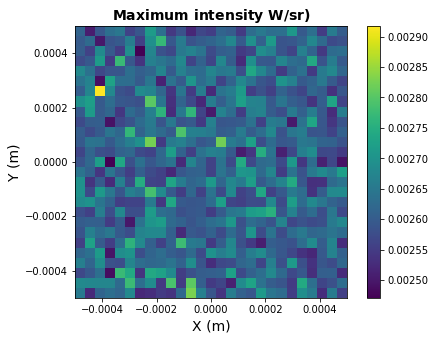

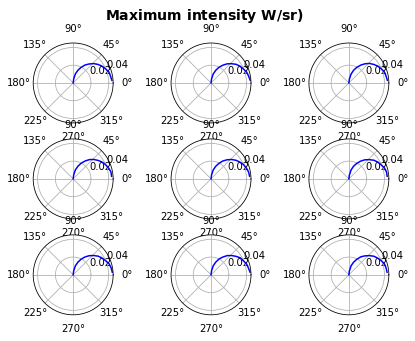

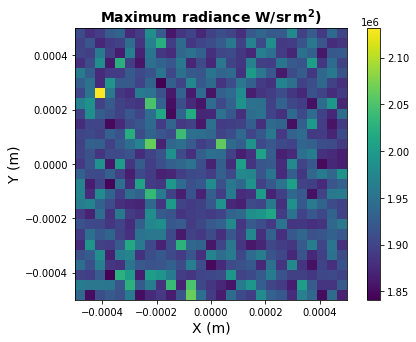

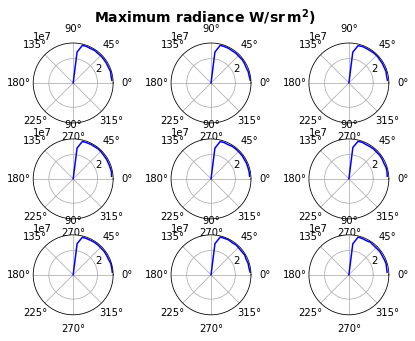

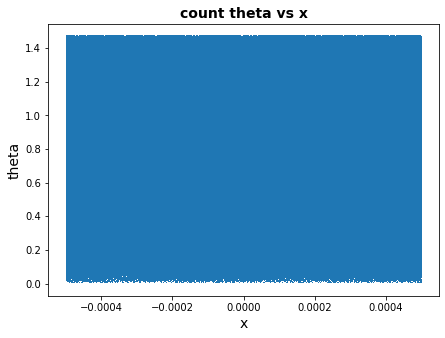

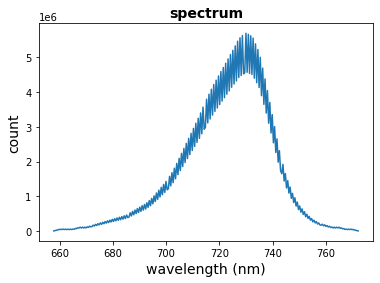

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Lightbox

photon bundle count: 340834827
photon total energy (J): 0.00469
photon total power (W): 4.68660


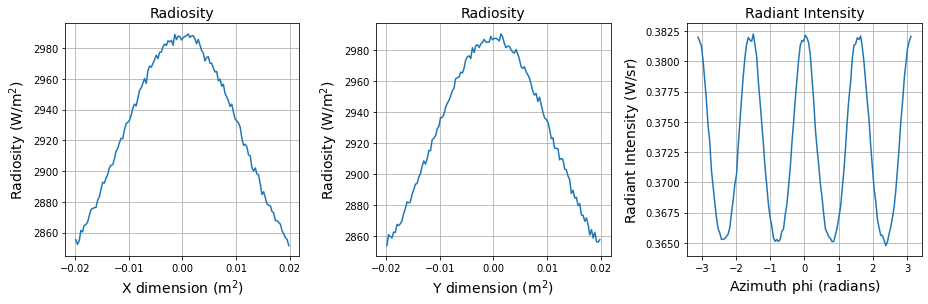

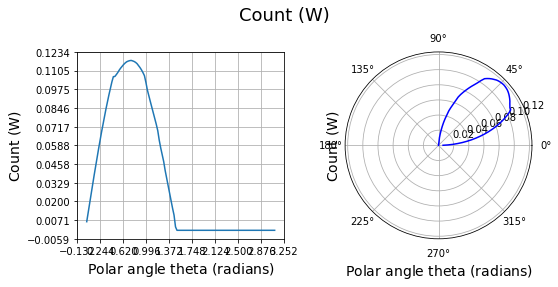

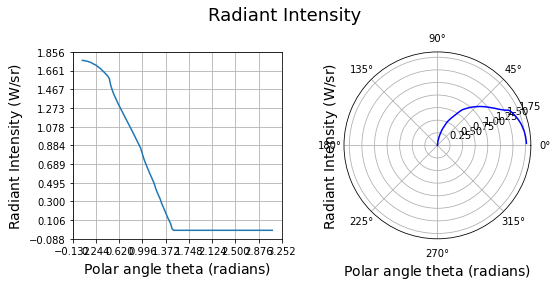

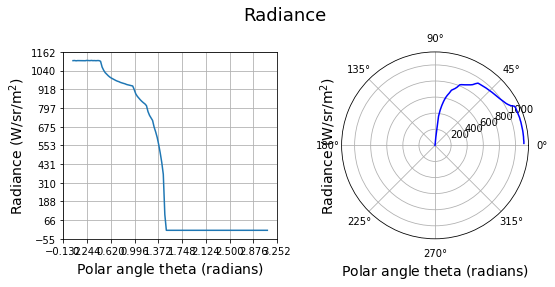

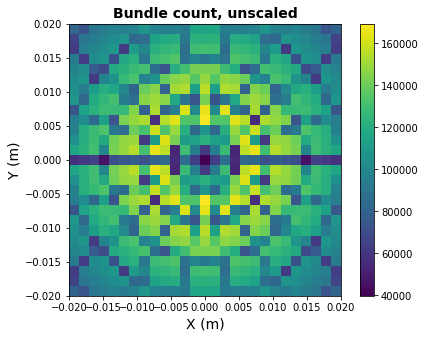

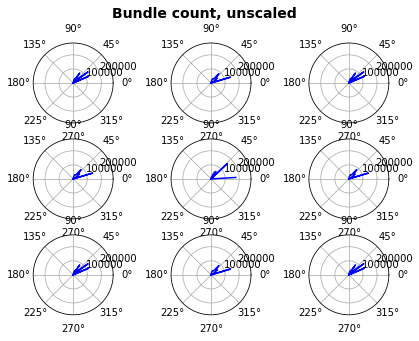

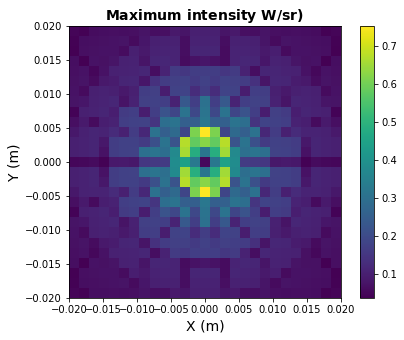

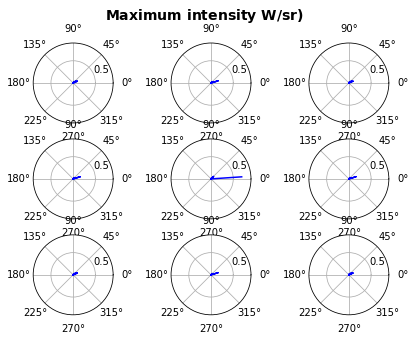

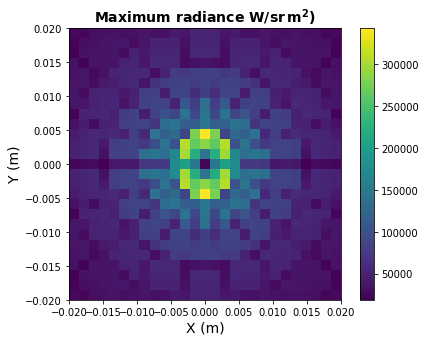

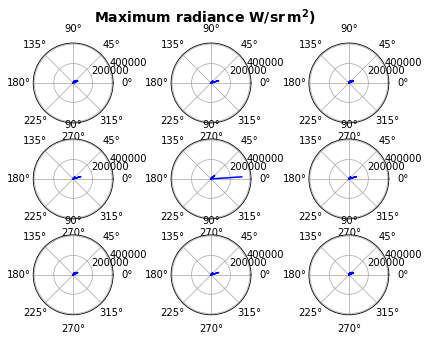

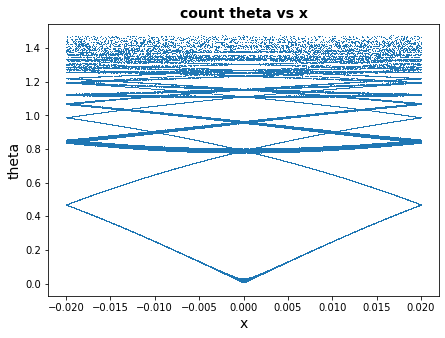

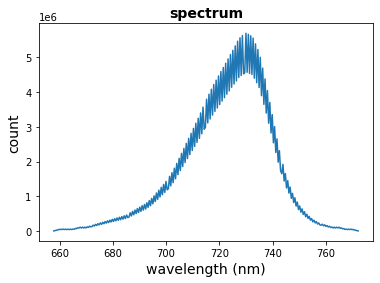

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

# <center> Diffuser

photon bundle count: 212468559
photon total energy (J): 0.00292
photon total power (W): 2.92152


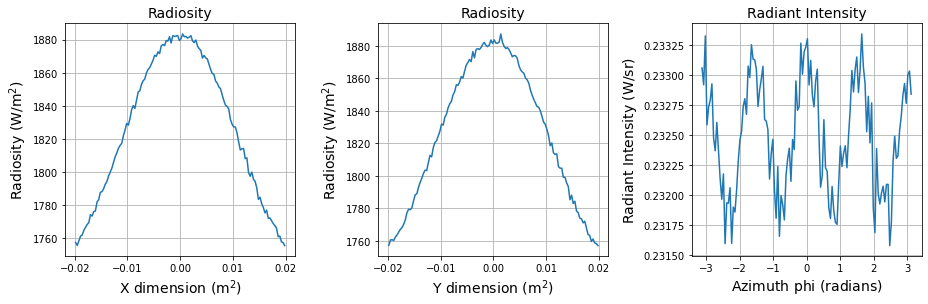

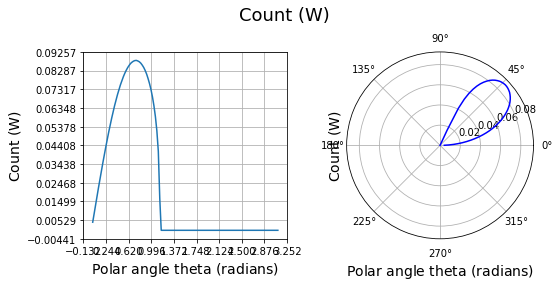

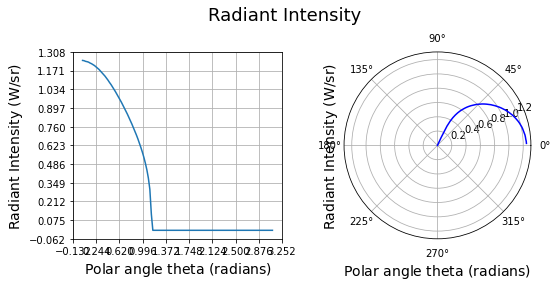

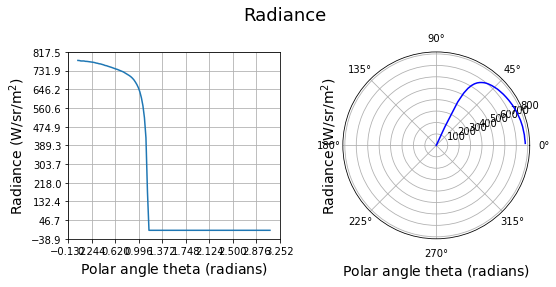

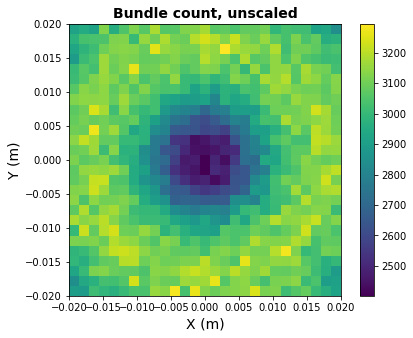

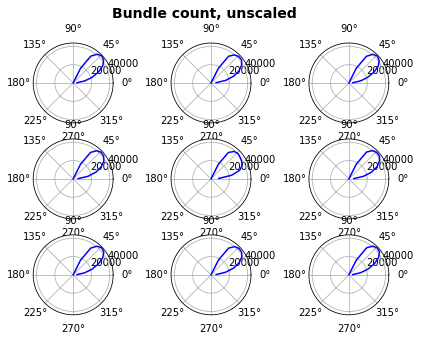

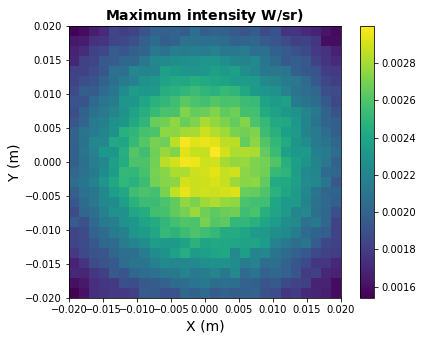

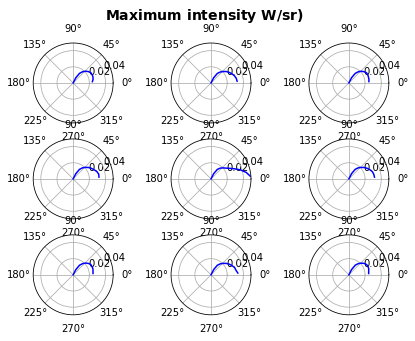

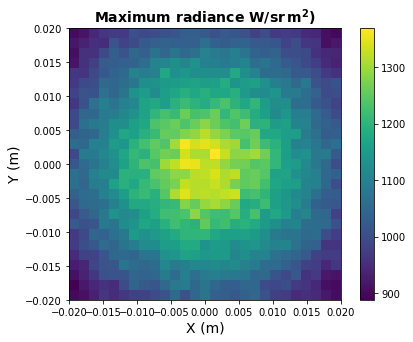

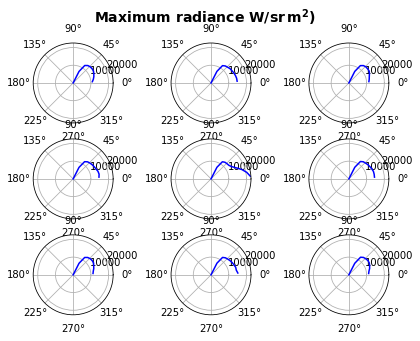

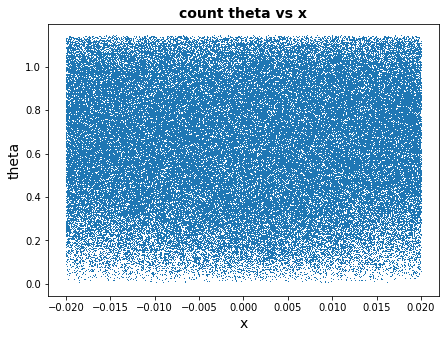

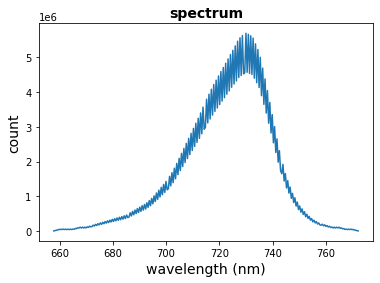

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

# <center> Outbound

photon bundle count: 9204
photon total energy (J): 0.00000
photon total power (W): 0.00013


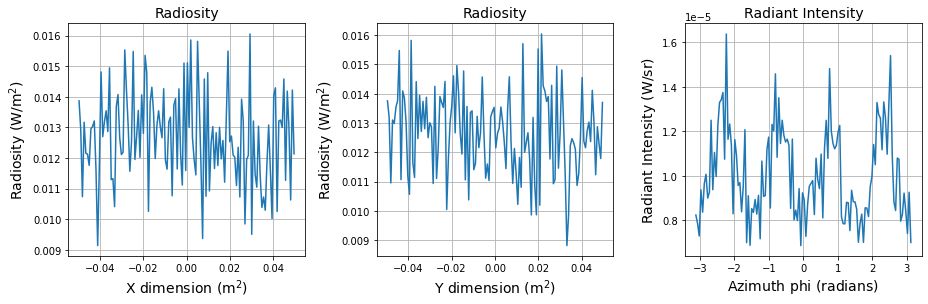

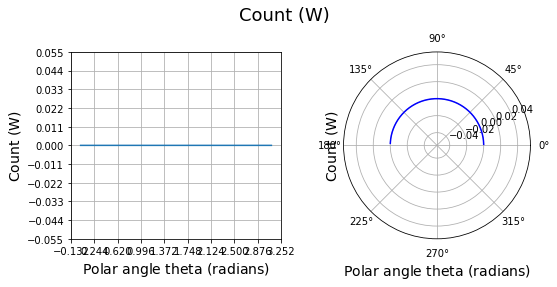

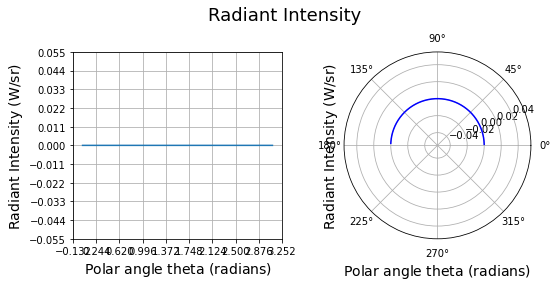

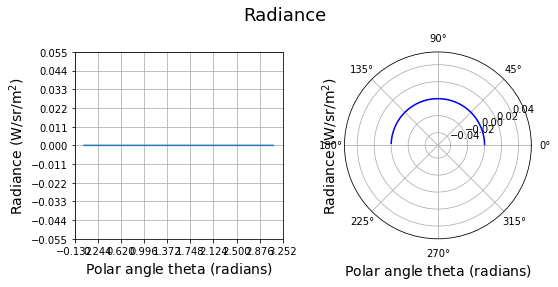

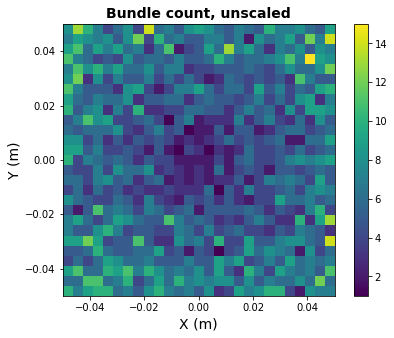

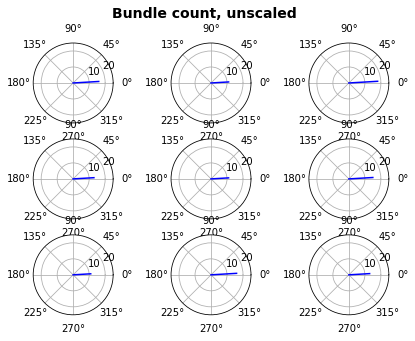

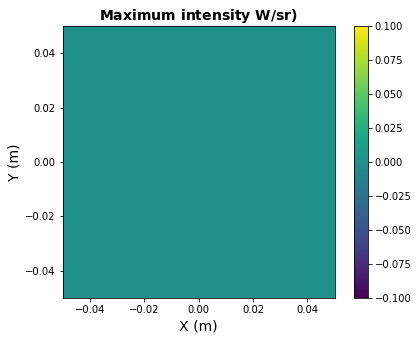

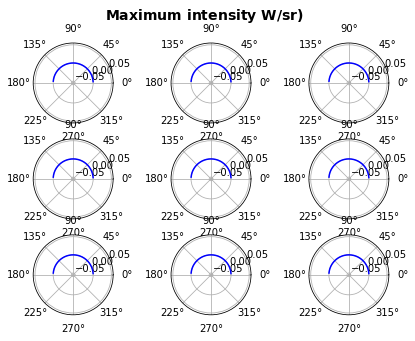

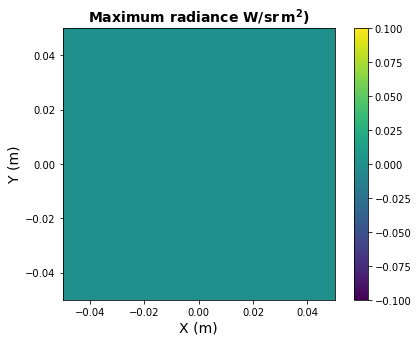

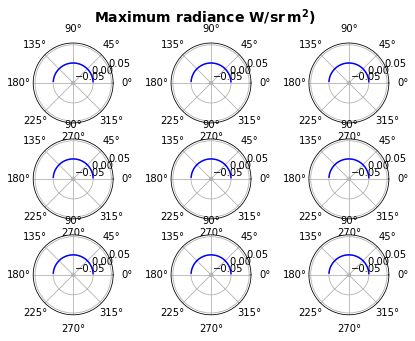

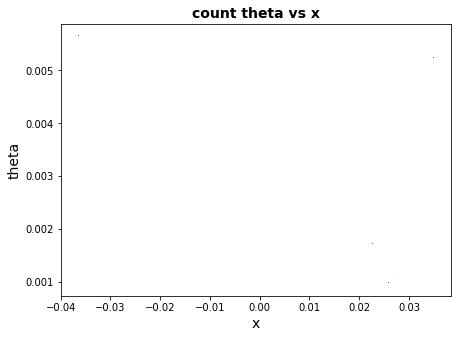

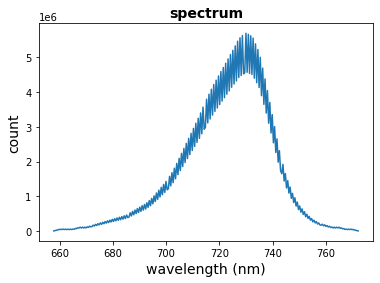

Output()

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

# <center> Inbound

photon bundle count: 9204
photon total energy (J): 0.00000
photon total power (W): 0.00013


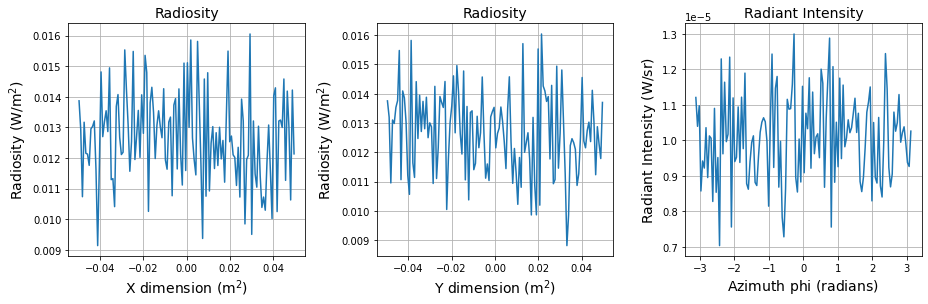

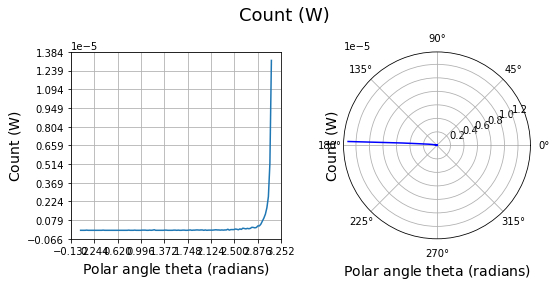

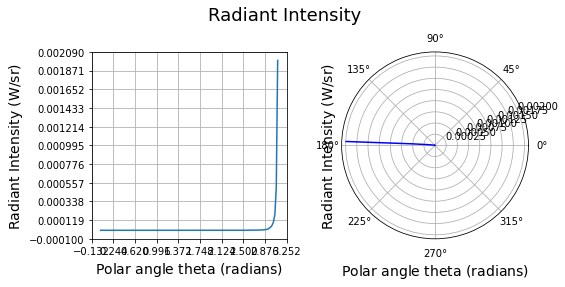

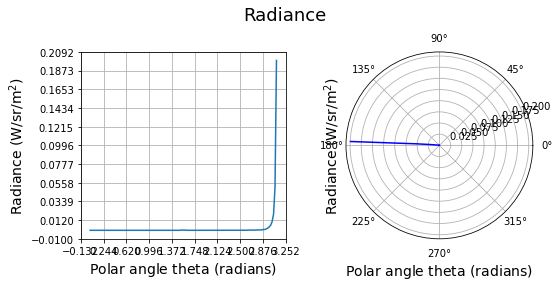

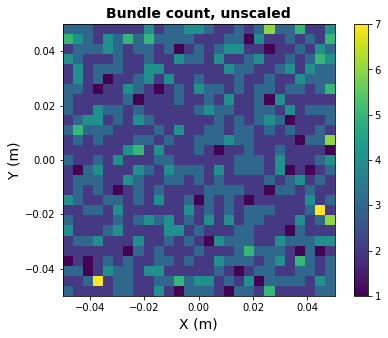

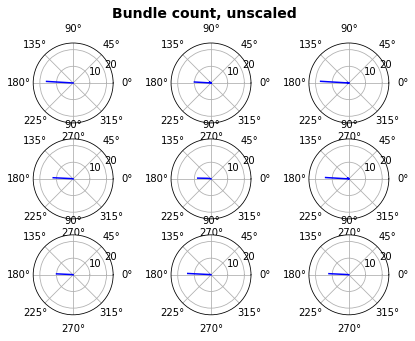

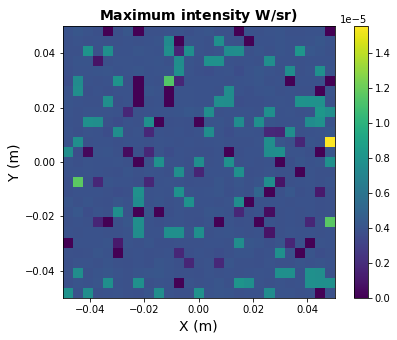

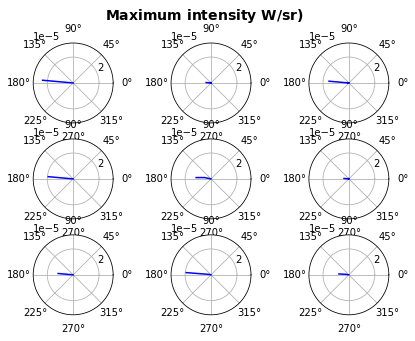

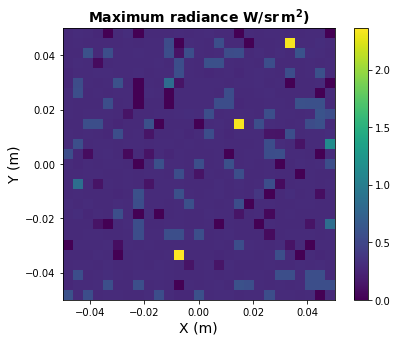

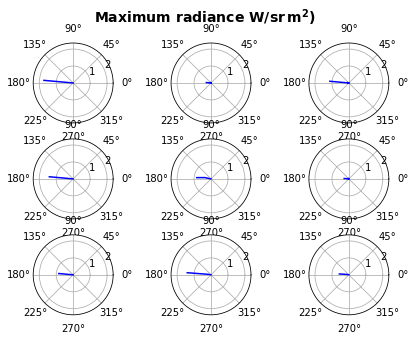

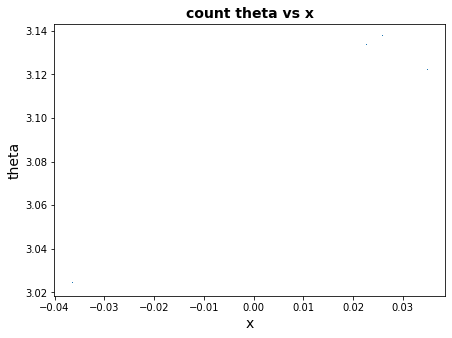

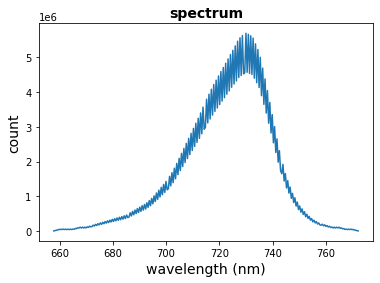

Output()

In [8]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

# <center> Camera Plane

photon bundle count: 4036
photon total energy (J): 0.00000
photon total power (W): 0.00006


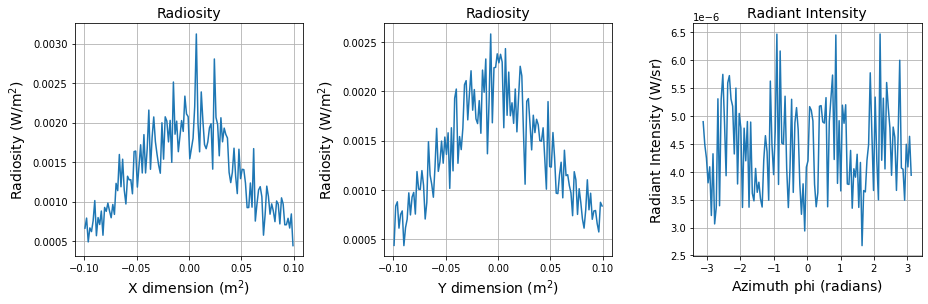

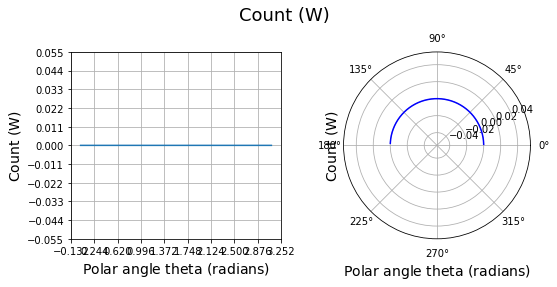

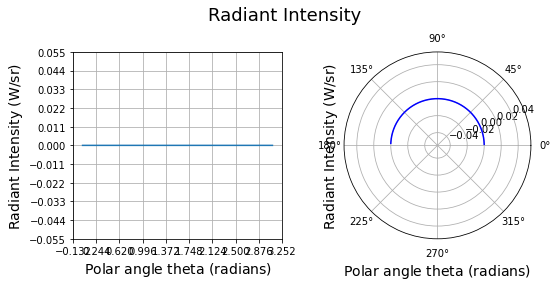

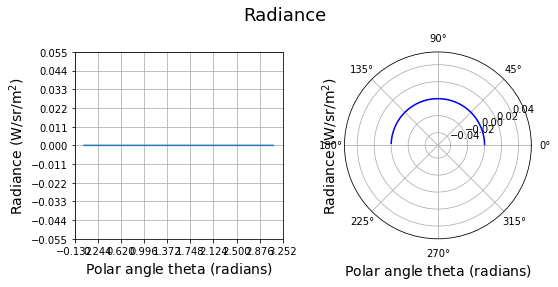

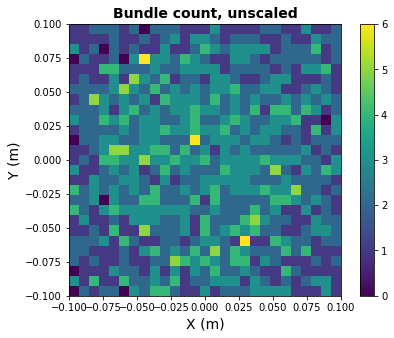

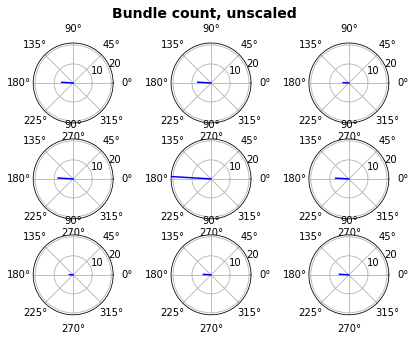

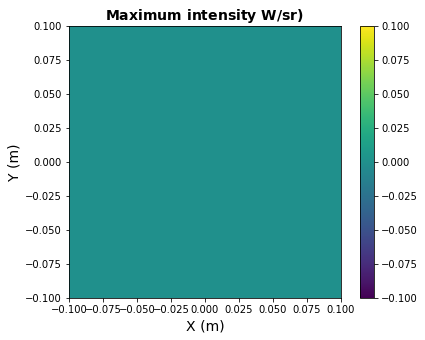

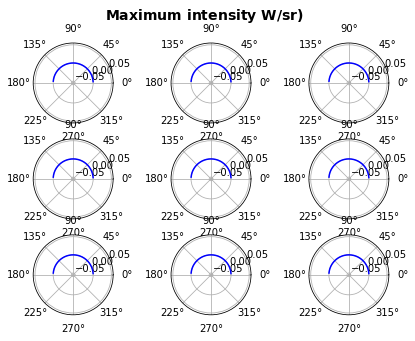

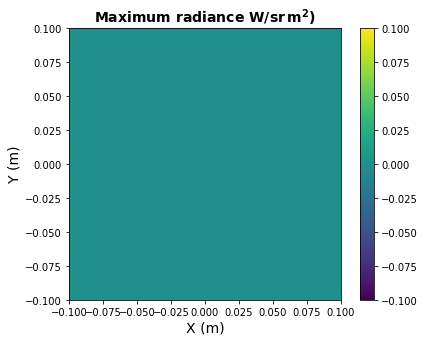

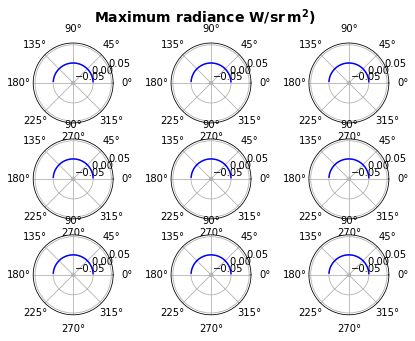

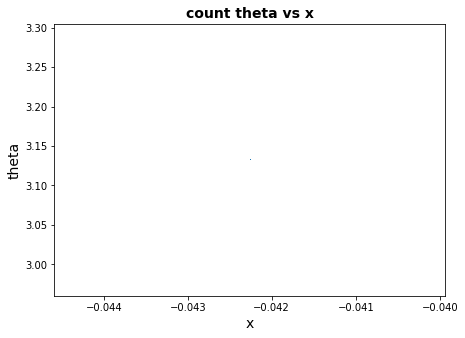

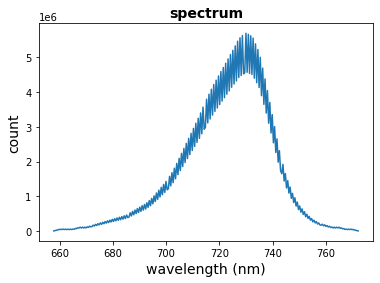

Output()

In [9]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [10]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()

In [11]:
print(f"camera total {simulator._camera._total_photons}")

camera total 1000000000.0
